This is a compulation of 2685 religious texts cited by ISIS over a 3 year period






Religious texts play a vital role ISIS ideology,propaganda,and recruitment.

This dataset is a compilation of all the religious  and ideoligical texts(muslims,christian,jewish,and other)

used in ISIS English-based magazines

INSPIRATION

We would like this data to be analysed by religious clerics to develop rebuttals of ISIS propaganda,

data scientists to generate insights from the texts,

and policymakers to understand how faith can shape countering violent extremeism efforts.We also need help

classifying some of the data that could nit be identified and has been marked unknown

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

In [48]:
df = pd.read_csv('isis.csv',delimiter = ',', encoding = 'latin-1')
df.head()

,Magazine,Issue,Date,Type,Source,Quote,Purpose,Article Name
0,Dabiq,1.0,Jun-14,Jihadist,Abu Mus'ab az-Zarqawi,"The spark has been lit here in Iraq, and its h...",Support,First Page
1,Dabiq,1.0,Jun-14,Hadith,Sahih Muslim,The Hour will not be established until the Ro...,Support,Introduction
2,Dabiq,1.0,Jun-14,Jihadist,Abu Mus'ab az-Zarqawi,"The spark has been lit here in Iraq, and its ...",Support,Introduction
3,Dabiq,1.0,Jun-14,Jihadist,Abu Bakr al-Baghdadi,"O Muslims everywhere, glad tidings to you and...",Support,Khilafah Declared
4,Dabiq,1.0,Jun-14,Jihadist,Abu Bakr al-Baghdadi,"O Ummah of Islam, indeed the world today has ...",Support,The World has Divided into Two Camps


In [49]:
df.shape

(2685, 8)

In [50]:
df.columns

Index(['Magazine', 'Issue', 'Date', 'Type', 'Source', 'Quote', 'Purpose',
       'Article Name'],
      dtype='object')

In [51]:
df.isnull().sum()

Magazine           1
Issue              1
Date               1
Type               1
Source             5
Quote              1
Purpose         1851
Article Name      37
dtype: int64

In [52]:
df1 = df.dropna()
df1.head()

,Magazine,Issue,Date,Type,Source,Quote,Purpose,Article Name
0,Dabiq,1.0,Jun-14,Jihadist,Abu Mus'ab az-Zarqawi,"The spark has been lit here in Iraq, and its h...",Support,First Page
1,Dabiq,1.0,Jun-14,Hadith,Sahih Muslim,The Hour will not be established until the Ro...,Support,Introduction
2,Dabiq,1.0,Jun-14,Jihadist,Abu Mus'ab az-Zarqawi,"The spark has been lit here in Iraq, and its ...",Support,Introduction
3,Dabiq,1.0,Jun-14,Jihadist,Abu Bakr al-Baghdadi,"O Muslims everywhere, glad tidings to you and...",Support,Khilafah Declared
4,Dabiq,1.0,Jun-14,Jihadist,Abu Bakr al-Baghdadi,"O Ummah of Islam, indeed the world today has ...",Support,The World has Divided into Two Camps


In [53]:
df1.tail()

,Magazine,Issue,Date,Type,Source,Quote,Purpose,Article Name
2405,Dabiq,8.0,Mar-15,Classical Islamic Scholar,"al-Barbahari, ""Sharh as-Sunnah""","Al-Barbah?r? (rahimahull?h  d. 329AH) said, ...",Support,Irja -The Most Dangerous Bid'ah
2408,Dabiq,8.0,Mar-15,Unknown,Sharh Sah?h Muslim,"Ibn Rajab (rahimahull?h) said, What is meant ...",Support,Irja -The Most Dangerous Bid'ah
2535,Dabiq,9.0,May-15,Hadith,Sunan Sa-id Ibn Mansur,"Ab? Hurayrah (radiyall?hu anhu) said, A day ...",Support,The Virutes of Ribat for the Cause of Allah
2537,Dabiq,9.0,May-15,Hadith,Sunan Sa-id Ibn Mansur,Abdur-Rahm?n Ibn Jubayr Ibn Nufayr reported th...,Support,Slave-Girls or Prostitutes?
2622,Dabiq,8.0,Mar-15,Unknown,Taysir al-Aziz al-Hamid,"Sulaym?n ?l ash-Shaykh (rahimahull?h) said, S...",Support,Irja -The Most Dangerous Bid'ah


In [54]:
df1.nunique()

Magazine          1
Issue            10
Date             10
Type             15
Source          448
Quote           814
Purpose           3
Article Name     89
dtype: int64

In [55]:
#so from the value count we could see that,purpose consists of number of people that supports the movement and 

#those that refused

print(df1.Purpose.value_counts())


Support    780
Refute      45
Suport       1
Name: Purpose, dtype: int64


In [56]:
df1.Type.unique()

array(['Jihadist', 'Hadith', "Qur'an", 'Tafsir',
       'Media, Politician, or Analyst', 'Classical Scholar',
       'Hadith Commentary', 'Hadith ', 'Sira', 'Unknown', 'Fatwa',
       'Salaf', 'Muslim Historical Figure', 'Fiqh',
       'Classical Islamic Scholar'], dtype=object)

In [57]:
df1.Type.value_counts()

Qur'an                           293
Hadith                           250
Jihadist                          81
Classical Scholar                 69
Media, Politician, or Analyst     42
Unknown                           31
Tafsir                            26
Hadith Commentary                 10
Fatwa                              6
Fiqh                               5
Sira                               4
Salaf                              4
Muslim Historical Figure           3
Classical Islamic Scholar          1
Hadith                             1
Name: Type, dtype: int64

In [58]:
#the value cunts for the magazine
df.Magazine.value_counts()

Dabiq      1481
Rumiyah    1203
Name: Magazine, dtype: int64

In [59]:
len(pd.unique(df1.Source))

448

In [60]:
pd.unique(df1.Source)

array(["Abu Mus'ab az-Zarqawi", 'Sahih Muslim', 'Abu Bakr al-Baghdadi',
       'Al-Hakim', 'an-Nahl 94', 'No Source Given', 'Sahih Bukhari',
       'Bukhari, Muslim', 'Baqarah 124', 'Al-Qurtubi',
       'Tafsir Ibn Kathir', 'Baqarah 130', 'Sunan ad-Darim',
       'Ahmad, at-Tirmidhi', 'Douglas A. Ollivant, Brian Fishman',
       'Ahmad', 'Abu \x91Amr ad-Dani, "As-Sunan ul Waridatu fil-Fitan"',
       "Ahmad, An-Nasa'i", 'Imam Shafi', 'at-Taqbah 15', 'Hud 25-26',
       'Nuh 25', 'Hud 38-39', 'al-Ankabut 15', 'al-Qamar 15', 'al-Ashur',
       'Hud 37', 'Bukhari & Muslim',
       'Ibn Hajar al-Asqalani, "Fath ul-Bari"', 'Musnad Ahmad',
       'Abu Muhammad al-Adnani', 'al-Imran 59-61', 'Maryam 75',
       'Tafsir Ibn Kathir/Quran', "Mukhtasar as-Sawa'iq al- Mursalah",
       'Ibn al-Qayyim, "Zad al-Ma\'ad"',
       'Mashhur al-Salman, "Al-Qawl al-Mubni"', 'Tafsir at-Tabari',
       'Ibn Qasim an-Najdi', 'Ahmad, Ibn Hibban',
       'Ahmad, Ibn Hibban, al-Hakim', 'Ab? \x91Abdill?h ash-Sham

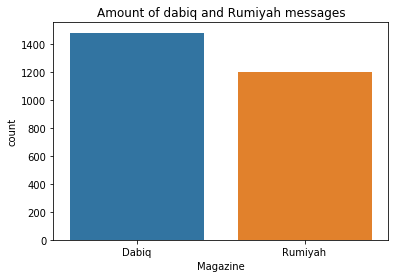

In [61]:
#Plot the counts of Dabique and Rumiyah 
sns.countplot(data = df, x= df['Magazine']).set_title("Amount of dabiq and Rumiyah messages")
plt.show()

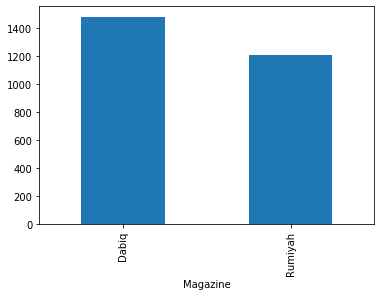

In [62]:
df.groupby(['Magazine'])['Quote'].count().plot.bar()

In [63]:
len(pd.unique(df1.Type))

15

so lets seperate the columns we would love to focus on for our futher analysis

I.E : for our text classification.....

In [64]:
used_col =['Quote','Magazine']

df1 = df[used_col]

df1.head()

,Quote,Magazine
0,"The spark has been lit here in Iraq, and its h...",Dabiq
1,The Hour will not be established until the Ro...,Dabiq
2,"The spark has been lit here in Iraq, and its ...",Dabiq
3,"O Muslims everywhere, glad tidings to you and...",Dabiq
4,"O Ummah of Islam, indeed the world today has ...",Dabiq


In [65]:
old_colms =list(df1.columns.values)
new_colms = [0,1]
colms_dict = dict(zip(old_colms,new_colms))
df11 = df1.rename(columns = colms_dict)
df11.head()

,0,1
0,"The spark has been lit here in Iraq, and its h...",Dabiq
1,The Hour will not be established until the Ro...,Dabiq
2,"The spark has been lit here in Iraq, and its ...",Dabiq
3,"O Muslims everywhere, glad tidings to you and...",Dabiq
4,"O Ummah of Islam, indeed the world today has ...",Dabiq


In [74]:
df2 = df11[1]
df2.head(12)

0     Dabiq
1     Dabiq
2     Dabiq
3     Dabiq
4     Dabiq
5     Dabiq
6     Dabiq
7     Dabiq
8     Dabiq
9     Dabiq
10    Dabiq
11    Dabiq
Name: 1, dtype: object

In [76]:
df2.isnull().sum()

1

so we would need to drop the na values...

so it doesnt affect our analysis as it goes on

In [78]:
 df22 = df2.dropna()
df22.head()

0    Dabiq
1    Dabiq
2    Dabiq
3    Dabiq
4    Dabiq
Name: 1, dtype: object

In [79]:
df22.isnull().sum()

0

so we already dealt with the na values,so we just wamted to check to confirm...

yippeee,its been confirmed no na values....

In [82]:
df22.value_counts()

Dabiq      1481
Rumiyah    1203
Name: 1, dtype: int64

In [106]:
df22.unique()

array(['Dabiq', 'Rumiyah'], dtype=object)